In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AffinityPropagation

In [3]:
# 1) Cargue los datos y normalice dichos datos restando la media y dividiendo por la desviación estándar.
wine = load_wine()
X = wine.data
y = wine.target
scaler = StandardScaler()
X_normalizado = scaler.fit_transform(X)

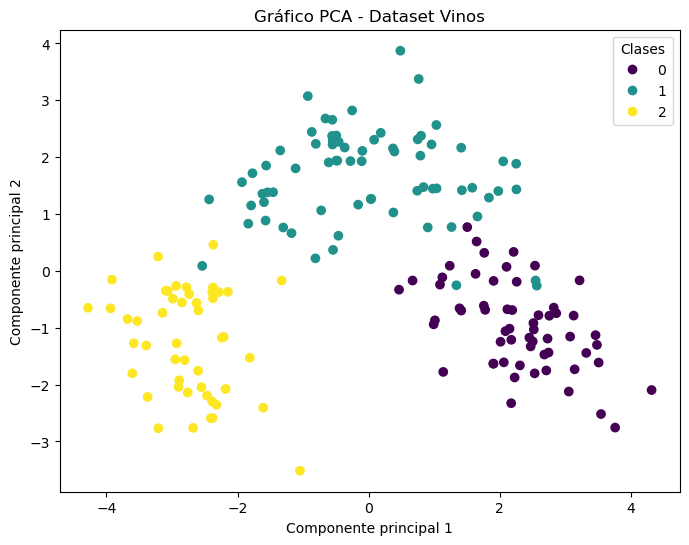

In [26]:
# 2) Aplique el algoritmo PCA a los datos normalizados para reducir su dimensionalidad a 2.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalizado)

# Realice un gráfico de dispersión de los datos obtenidos luego de aplicar PCA, utilizando marcadores de diferentes colores para las diferentes clases.
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
legend1 = plt.legend(*scatter.legend_elements(), title="Clases")
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Gráfico PCA - Dataset Vinos')
plt.show()

In [68]:
# 3) Utilice el comando train_test_split para separar el dataset obtenido en el apartado anterior, en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=20)

C:\Users\Usuario\anaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario\anaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Usuario\anaconda3.1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

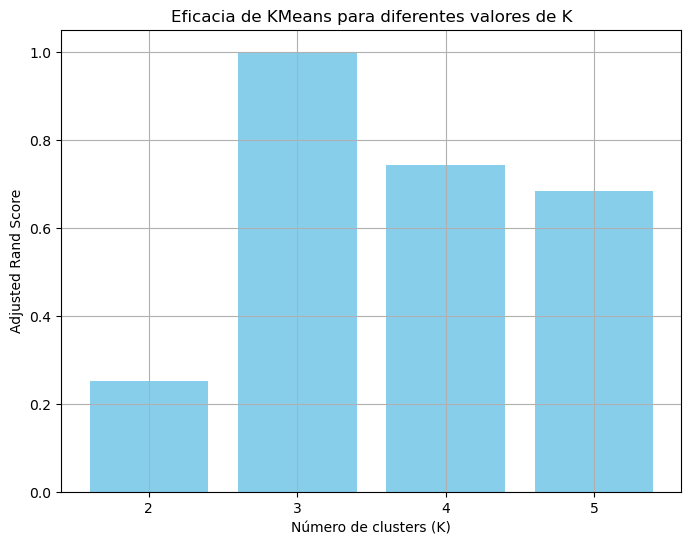

In [70]:
# 4) Sin utilizar las etiquetas del dataset, aplique el algoritmo KMeans a los datos de entrenamiento. Considere valores de K (número de clusters) de 
# 2, 3, 4 y 5, y utilice la función adjusted_rand_score para evaluar el desempeño obtenido sobre los datos de prueba, para los diferentes valores de K.
k_values = []
rand_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=20)
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_test)
    score = adjusted_rand_score(y_test, y_pred)
    k_values.append(k)
    rand_scores.append(score)

#Creo el gráfico para que se muestre mejor la diferencia entre los distintos valores de K.
plt.figure(figsize=(8, 6))
plt.bar(k_values, rand_scores, color='skyblue')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Adjusted Rand Score')
plt.title('Eficacia de KMeans para diferentes valores de K')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [82]:
# 5) Sin utilizar las etiquetas del dataset, aplique el algoritmo de propagación de afinidad sobre los datos de entrenamiento. Utilice la función 
# adjusted_rand_score para evaluar el desempeño obtenido sobre los datos de prueba. La precisión obtenida debe ser mayor o igual al 90%. 
aff_prop = AffinityPropagation(preference=-70, damping=0.5, random_state=None)
aff_prop.fit(X_train)
y_pred = aff_prop.predict(X_test)
score = adjusted_rand_score(y_test, y_pred)
print(f"Adjusted Rand Score: {score}")

Adjusted Rand Score: 1.0


In [ ]:
#COMENTARIOS

#Sobre la creación del algoritmo de PCA no hay mucho que comentar, ya que seguí las consignas al pie de la letra.

#Algoritmo KMeans
#1. Jugando con los valores para lograr un adjusted rand score mayor al 90%, empecé cambiando el valor del random_state del comando train_test_split.

#2. Primero lo miré con el algoritmo de PCA que, con un valor de 10 (solo probé con múltiplos de 10), lograba una eficacia entre el 70 y el 80%
# (en la columna de k=2), y cuando lo subí a 20, logré la precisión sorprendente del 100%, por lo que lo dejé en ese valor.

#3. Luego, en los parámetros del modelo de KMeans, puse todos los valores predeterminados que se enseñaron en la clase (preference=-50, damping=0.5 y
# random_state=None), por lo que empecé cambiando el parametro preference.

#4. Nuevamente, en múltiplos de 10, esta vez fui disminuyendo el valor, y al llegar al -70, nuevamente logré la precisión de 100%.